# **Ensemble 퀴즈**
## 주어진 데이터를 활용하여 모델을 적합하고, 최적의 모델을 찾으세요.
- Ensemble 실습 퀴즈 (bagging / boosting / BGM)
- 모델은, RandomForestClassifier, GradientBoostingClassifier, lightgbm 을 사용하세요.
- 각 모델별로 최적의 파라미터를 찾으세요. (평가는 f1 score)
- 모델간의 평가는 ROC 값으로 하고, ROC 커브로 비교하세요.

In [33]:
# import library

import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve


import warnings
warnings.simplefilter("ignore", UserWarning)

In [34]:
filename = '../data/pima-indians-diabetes.csv'
dataframe = pd.read_csv(filename, header=None)
dataframe.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']

array = dataframe.values

X = array[:,0:8].astype(float)  # 0 - 7 column은 독립변수
Y = array[:,8].astype(int) # 마지막 column은 종속변수

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

---

### RandomForestClassifier

In [35]:
'''
hyperparameter를 정의하세요
'''
param_grid = {'n_estimators': [100, 200],
              'oob_score': [True], # compute out of bag error
              'n_jobs':[-1], 
              'max_depth': [3, 5]
              }

In [36]:
'''
모델을 정의하세요
'''
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [37]:
'''
hyperparameter를 search 하세요
'''
grid_search = GridSearchCV(estimator= rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 200],
                         'n_jobs': [-1], 'oob_score': [True]})

In [38]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_n_jobs,param_oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.347470,0.055710,0.032573,0.005892,3,100,-1,True,"{'max_depth': 3, 'n_estimators': 100, 'n_jobs'...",0.759259,0.787037,0.794393,0.654206,0.785047,0.755988,0.052257,4
1,0.535851,0.080935,0.054394,0.006816,3,200,-1,True,"{'max_depth': 3, 'n_estimators': 200, 'n_jobs'...",0.759259,0.777778,0.794393,0.663551,0.785047,0.756006,0.047643,3
2,0.288815,0.016388,0.028958,0.002506,5,100,-1,True,"{'max_depth': 5, 'n_estimators': 100, 'n_jobs'...",0.740741,0.777778,0.822430,0.682243,0.803738,0.765386,0.049797,1
3,0.514161,0.085269,0.057935,0.005955,5,200,-1,True,"{'max_depth': 5, 'n_estimators': 200, 'n_jobs'...",0.740741,0.768519,0.803738,0.672897,0.813084,0.759796,0.050520,2


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
'''
최적의 파라미터로 최적의 모델을 결정하세요
'''
rf_opt = grid_search.best_estimator_
pred = rf_opt.predict(X_test)

round(accuracy_score(y_test,pred),2)

0.75

### GradientBoostingClassifier

In [40]:
'''
hyperparameter를 정의하세요
'''
param_grid = {'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.001, 0.0001], 
              'max_depth': [1, 3, 5]
              }

In [41]:
'''
모델을 정의하세요
'''
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

In [42]:
'''
hyperparameter를 search 하세요
'''
grid_search = GridSearchCV(gb_model,param_grid,cv=5)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.001, 0.0001],
                         'max_depth': [1, 3, 5], 'n_estimators': [100, 200]})

In [43]:
'''
최적의 파라미터로 최적의 모델을 결정하세요
'''
gb_opt = grid_search.best_estimator_
pred = gb_opt.predict(X_test)

round(accuracy_score(y_test,pred),2)

0.77

### ROC 커브로 모델 비교
- Hint :  fig.gca() 사용

/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/restful3/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; F

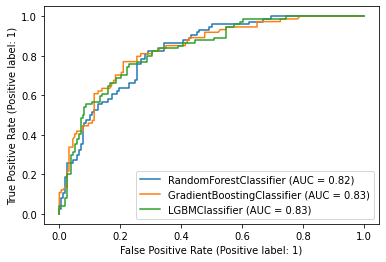

In [22]:
'''
ROC 커브로 최적의 모델을 산출하세요
'''
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt



---